Mean Squared Error: 42.27275304136253


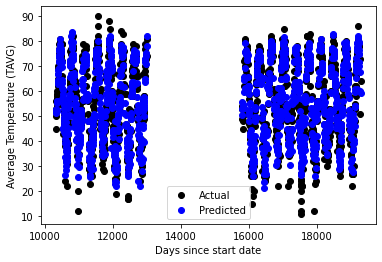

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load real-world weather data from a CSV file
# Replace 'your_dataset.csv' with the path to your CSV file
df = pd.read_csv('weather.csv')

# Extract relevant columns for the example (you may adjust based on your use case)
selected_columns = ['DATE', 'TAVG', 'PRCP', 'AWND', 'SNOW']
df = df[selected_columns]

# Convert date to numerical values (days since the start)
df['DATE'] = pd.to_datetime(df['DATE']).sub(pd.Timestamp(df['DATE'].iloc[0])).dt.days

# Drop rows with missing values
df = df.dropna()

# Separate features and target variable
X = df[['DATE', 'PRCP', 'AWND', 'SNOW']].values
y = df['TAVG'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the predictions
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual')
plt.scatter(X_test[:, 0], predictions, color='blue', label='Predicted')
plt.xlabel('Days since start date')
plt.ylabel('Average Temperature (TAVG)')
plt.legend()
plt.show()
